In [7]:
import pandas as pd
from bs4 import BeautifulSoup
import warnings
import requests
warnings.simplefilter(action='ignore', category=FutureWarning)

URL = "https://www.airlinequality.com/airline-reviews/british-airways"
page = requests.get(URL)


In [8]:
#Untuk mengambil data dari jumlah page yang ditentukan sendiri. pages 10 adalah page 1 sampai 10
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{URL}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


#Parse Content

In [ ]:
# import pandas as pd
# from bs4 import BeautifulSoup
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)


pages = 351 #10
page_size = 100 #100

reviews = []
df = pd.DataFrame()

# Untuk melakukan scraping ditiap Page
for i in range(1, pages + 1):

    rating = []
    category = []

    print(f"Scraping page {i}")

    # Membuat URL untuk membuat link berganti di setiap perulangan
    url = f"{URL}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)

    # Parse content
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')

    #Scraping Comment
    for para in soup.find_all("div", {"class": "ant-table-content"}): #mengambil comment
        reviews.append(para.get_text())

    for para2 in soup.find_all("div", {"class" : "review-stats"}): #mengambil semua data yang ada di review-stats
        for para3 in para2.find_all('td',{'class' : 'review-value'}): #filtering review-stats ke review-value
            rating.append(para3.get_text())
        recomend = rating[-1] #hanya memasukkan data terakhir, yaitu yes/no. saat mencari "review-value", "review-value rating-no" juga terbaca.
        rating = rating[:-1] #memasukkan list rating kecuali data terakhir [:-1]

        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}): #filter data, review-stats > review-rating-stars stars
            para5 = len(para4.find_all('span', {'class' : 'star fill'})) #filter data, review-stats > review-rating-stars stars > star fill (bintang yang terisi)
            rating.append(para5) #menambahkan data baru ke rating
        rating.append(recomend) #menambahkan recommend[] (yes/no) di akhir data. Saya ingin kolom recommend dibelakang
        #print(rating)

        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}): #mengambil header, untuk membuat nama kolom ditiap rating
            category.append(para6.get_text()) #Type Of Traveller, Seat Type, Route, .....


        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = pd.concat([df, data_dict], ignore_index=True)
        #print(df)
        rating = [] #untuk menyimpan data setiap perulangan
        category = [] #untuk menyimpan data setiap perulangan

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 0 total reviews
Scraping page 2
   ---> 0 total reviews
Scraping page 3
   ---> 0 total reviews
Scraping page 4
   ---> 0 total reviews
Scraping page 5
   ---> 0 total reviews
Scraping page 6
   ---> 0 total reviews
Scraping page 7
   ---> 0 total reviews
Scraping page 8
   ---> 0 total reviews
Scraping page 9
   ---> 0 total reviews
Scraping page 10
   ---> 0 total reviews
Scraping page 11
   ---> 0 total reviews
Scraping page 12
   ---> 0 total reviews
Scraping page 13
   ---> 0 total reviews
Scraping page 14
   ---> 0 total reviews
Scraping page 15
   ---> 0 total reviews
Scraping page 16
   ---> 0 total reviews
Scraping page 17
   ---> 0 total reviews
Scraping page 18
   ---> 0 total reviews
Scraping page 19
   ---> 0 total reviews
Scraping page 20
   ---> 0 total reviews
Scraping page 21
   ---> 0 total reviews
Scraping page 22
   ---> 0 total reviews
Scraping page 23
   ---> 0 total reviews
Scraping page 24
   ---> 0 total reviews
Scraping page 25
   ---> 

Melakukan save ke csv

In [ ]:
df.to_csv("P_BA_reviews.csv", index=False)

##Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/P_BA_reviews.csv')

In [ ]:
df.tail()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Aircraft,reviews
3502,NaN,Business Class,NaN,NaN,4.0,3.0,NaN,3,yes,2.0,4.0,NaN,NaN,Flew return in CW from LHR to BKK in August 20...
3503,NaN,Business Class,NaN,NaN,4.0,5.0,NaN,3,yes,4.0,0.0,NaN,NaN,LHR to HAM. Purser addresses all club passenge...
3504,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,4,yes,NaN,NaN,NaN,NaN,My son who had worked for British Airways urge...
3505,NaN,Premium Economy,NaN,NaN,1.0,3.0,NaN,1,no,5.0,0.0,NaN,NaN,London City-New York JFK via Shannon on A318 b...
3506,NaN,First Class,NaN,NaN,4.0,5.0,NaN,2,no,5.0,2.0,NaN,NaN,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type Of Traveller       2737 non-null   object 
 1   Seat Type               3505 non-null   object 
 2   Route                   2733 non-null   object 
 3   Date Flown              2729 non-null   object 
 4   Seat Comfort            3405 non-null   float64
 5   Cabin Staff Service     3395 non-null   float64
 6   Ground Service          2668 non-null   float64
 7   Value For Money         3507 non-null   int64  
 8   Recommended             3507 non-null   object 
 9   Food & Beverages        3163 non-null   float64
 10  Inflight Entertainment  2457 non-null   float64
 11  Wifi & Connectivity     529 non-null    float64
 12  Aircraft                1830 non-null   object 
 13  reviews                 3507 non-null   object 
dtypes: float64(6), int64(1), object(7)
memor

In [ ]:
def missing_check(df):
    missing = df.isnull().sum()
    percent = 100*(missing/len(df))
    number_unique = df.nunique()
    data_type = df.dtypes
    return pd.DataFrame({"Missing":missing,
                          "Percent_Missing":percent,
                          "Number_Unique":number_unique,
                          "Data_Types":data_type}).sort_values("Percent_Missing")

Nilai missing value dibawah dikarenakan banyak user yang tidak memberikan review

In [ ]:
# check missing value
missing_check(df)

,Missing,Percent_Missing,Number_Unique,Data_Types
Value For Money,0,0.000000,6,int64
Recommended,0,0.000000,2,int64
reviews,0,0.000000,3494,object
Seat Type,2,0.057029,4,object
Seat Comfort,102,2.908469,5,float64
Cabin Staff Service,112,3.193613,5,float64
Food & Beverages,344,9.808954,6,float64
Type Of Traveller,770,21.956088,4,object
Route,774,22.070145,1506,object
Date Flown,778,22.184203,104,datetime64[ns]


In [ ]:
remove_text = ['✅ Trip Verified |', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [ ]:
print(df['reviews'])

0        I was meant to fly in January to Algeria. I p...
1         We have flown repeatedly with British Airway...
2         I was horrified by the extremely small seats...
3         The worst cabin experience ever: cramped sea...
4        First time flying with British Airways and fi...
                              ...                        
3502    Flew return in CW from LHR to BKK in August 20...
3503    LHR to HAM. Purser addresses all club passenge...
3504    My son who had worked for British Airways urge...
3505    London City-New York JFK via Shannon on A318 b...
3506    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3507, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-26-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
# filtering the rows where Credit-Rating is Fair
df = df[df['reviews'].str.contains('cabin')]
df['reviews'].tail(2)

3500    HKG-LHR in New Club World on Boeing 777-300 - 26/08/12. Bought ticket in WT+ and managed to get a last minute upgrade using Avios to Club. First time in a premium cabin. The seats are comfortable if a little narrow but they easily move to the lie flat position meaning I was able to get 6 hours sleep. Plenty of good quality champagne and wines offered before and during dinner. 3 course dinner sounded a lot better than it actually tasted. BA should think more about ease of food preparation on board rather than trying to do lavish dishes that don't quite come off. Breakfast was better than expected - plenty of choice and a good selection of fresh rolls and croissants. AVOD worked well. My only complaint was that the cabin crew found it very difficult to be friendly. Every request appeared to be an inconvenience to them - little things like milk and sugar for my coffee. Generally though I would have to give Club World the thumbs up if only because a lie flat bed is infinitely more 

##Datetime Processing

In [ ]:
df2 = df

In [ ]:
df2.dropna(subset=['Date Flown'],inplace=True)
df2['Date Flown'].isna().sum()

0

In [ ]:
df2['Date Flown'].unique()

array(['May 2022', 'March 2023', 'December 2022', 'April 2022',
       'January 2023', 'February 2023', 'October 2022', 'November 2022',
       'June 2022', 'January 2022', 'August 2022', 'July 2022',
       'September 2022', 'November 2021', 'July 2021', 'February 2022',
       'March 2022', 'August 2021', 'October 2021', 'December 2021',
       'January 2021', 'September 2021', 'November 2020', 'October 2020',
       'April 2021', 'June 2021', 'May 2021', 'December 2020',
       'February 2021', 'September 2020', 'July 2020', 'November 2019',
       'August 2020', 'February 2020', 'March 2020', 'April 2020',
       'May 2020', 'June 2020', 'December 2019', 'August 2019',
       'October 2019', 'January 2020', 'July 2019', 'September 2019',
       'April 2019', 'May 2019', 'February 2019', 'November 2018',
       'June 2019', 'September 2018', 'October 2018', 'January 2019',
       'March 2019', 'December 2018', 'April 2018', 'March 2018',
       'August 2018', 'February 2018', 'June 

In [ ]:
df2['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y')

In [ ]:
df2['Date Flown'] = df2['Date Flown'].apply(lambda x: x.strftime('%B %Y'))

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
missing_check(df2)

In [ ]:
df_year = df.groupby(['Date Flown'])['reviews'].count().sort_values(ascending=False)
df_year

Date Flown
2015-08-01    83
2015-09-01    78
2015-11-01    66
2017-04-01    65
2015-10-01    64
              ..
2014-12-01     2
2014-08-01     1
2014-10-01     1
2020-06-01     1
2014-07-01     1
Name: reviews, Length: 104, dtype: int64

<ipython-input-191-bb85100d27a0>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Date Flown', y=df.groupby(['Date Flown'])['reviews'].count(),linewidth=3, palette='Set2', data=df_year)


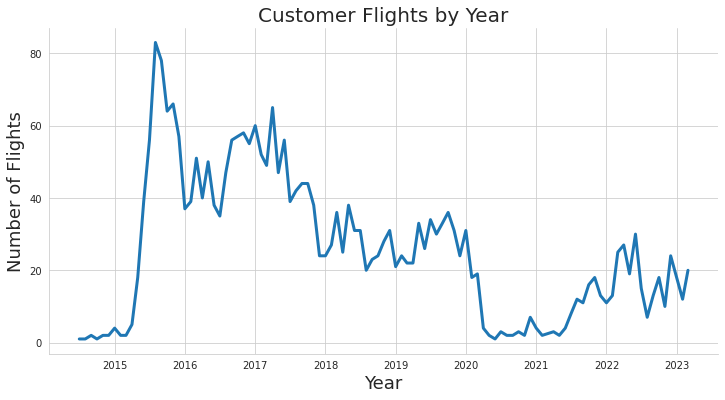

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_year = df.groupby(['Date Flown'])['reviews'].count().sort_values(ascending=False)

# Create the plot
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Date Flown', y=df.groupby(['Date Flown'])['reviews'].count(),linewidth=3, palette='Set2', data=df_year)

sns.despine()
plt.title('Customer Flights by Year', fontsize=20)
# Add x-label and y-label
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Flights', fontsize=18)


# Show the plot
plt.show()

In [ ]:
df2.to_csv("linechart.csv",sep = ';', index=False)

##Data Analysis & Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Recommended Yes/No

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
LE = LabelEncoder()
df2 = df
df2['Recommended'] = LE.fit_transform(df2['Recommended'])
LE.classes_
print(np.sort(df['Recommended'].unique()))

[0 1]


In [ ]:
df_soc = df[df['Recommended'] == 0]
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity
count,1942.000000,1932.000000,1660.000000,2041.000000,2041.0,1740.000000,1360.000000,373.000000
mean,2.128733,2.436335,2.133133,1.742283,0.0,1.821264,2.021324,1.455764
std,1.085195,1.286743,1.214633,0.916740,0.0,1.004136,1.127090,0.904767
min,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.0,1.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,2.000000,0.0,2.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,0.0,5.000000,5.000000,5.000000


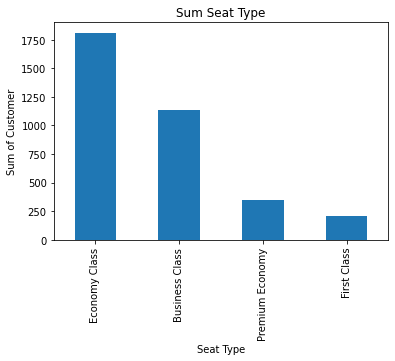

In [ ]:
df_year = df.groupby(['Seat Type'])['reviews'].count().sort_values(ascending=False)
df_year.plot(x = 'Seat Type', y = 'reviews', kind = 'bar', title = 'Sum Seat Type')

plt.xlabel('Seat Type')
plt.ylabel('Sum of Customer')
plt.show()

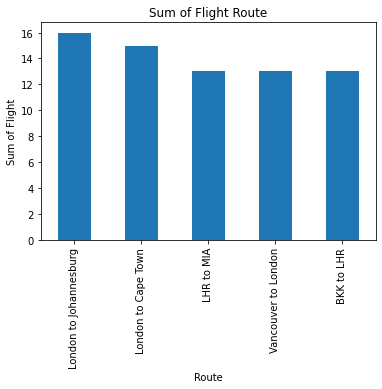

In [ ]:
df_year = df.groupby(['Route'])['reviews'].count().sort_values(ascending=False).head(5)
df_year.plot(x = 'Route', y = 'reviews', kind = 'bar', title = 'Sum of Flight Route')

plt.xlabel('Route')
plt.ylabel('Sum of Flight')
plt.show()

###Persentase Tipe Kursi

Mayoritas pengguna Britain Airways dari Economy Class

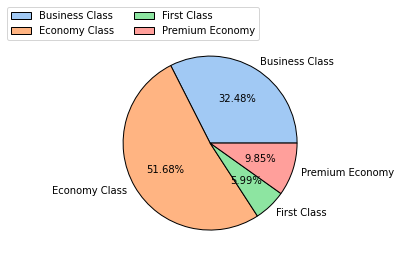

In [ ]:
soc = df.groupby('Seat Type')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Seat Type'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)

plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.show()

###Jumlah Kepuasan Kustomer

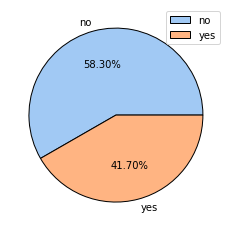

In [ ]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

### Persentage of Type Traveler

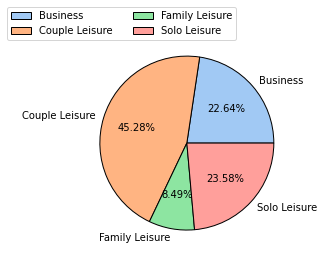

In [ ]:
soc = df.groupby('Type Of Traveller')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Type Of Traveller'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)

plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.show()

###**Word Cloud Visualization by Review**

Dari wordcloud dibawah bisa dilihat pengguna lebih sering membicarakan tentang flight, seat, delayed, cabin crew,....

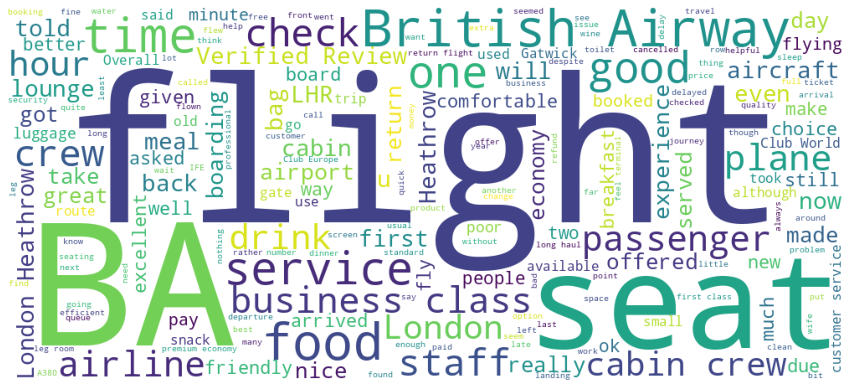

In [ ]:
from wordcloud import WordCloud
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

###**Word Cloud Visualization by Food**

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('food | drink ')]
data['reviews'].to_csv('test.csv')

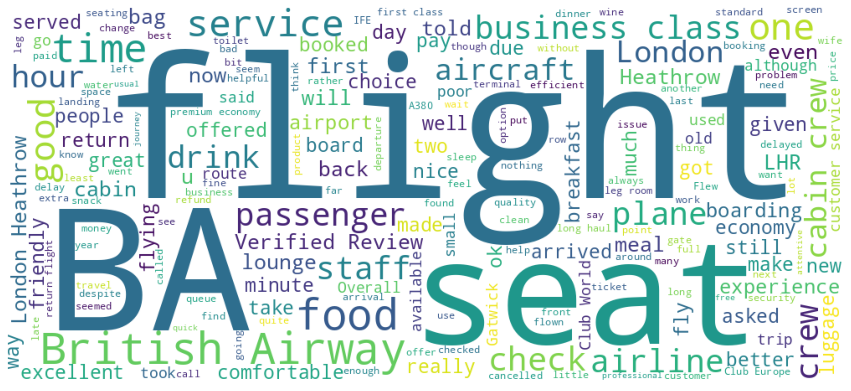

In [ ]:
from wordcloud import WordCloud
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('money | refund | time | hour')]
data['reviews'].to_csv('worth_review.csv')

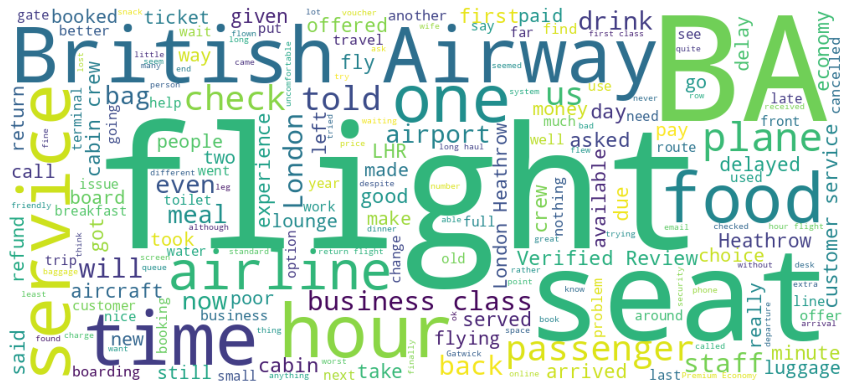

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

#EXPERIMENT

##Scraping person

In [ ]:
# person = []
person = soup.find_all('div' > "span" , {'itemprop':'name'} )[1:] #[1:] tidak menampilkan baris pertama
# person = [x.text for x in person]
print(person)

[<span itemprop="name">
              S Walder
             </span>, <span itemprop="name">
              L Garson
             </span>, <span itemprop="name">
              J Billot
             </span>, <span itemprop="name">
              l Higgs
             </span>, <span itemprop="name">
              D Vale
             </span>, <span itemprop="name">
              Glen Patrizio
             </span>, <span itemprop="name">
              C Lane
             </span>, <span itemprop="name">
              G May
             </span>, <span itemprop="name">
              A Ahmed
             </span>, <span itemprop="name">
              S Paice
             </span>]


## Scraping Comment Section

In [ ]:
comment = soup.find_all('h2', {'class':'text_header'} )
# comment.find_all('h2' > 'span', {"class":"mw-headline"}) ==> h2 > span >....
comment

[<h2 class="text_header">
             "how far the quality level has slid"
            </h2>, <h2 class="text_header">
             "worst cabin experience ever"
            </h2>, <h2 class="text_header">
             "Very impressive and efficient"
            </h2>, <h2 class="text_header">
             "We are done with BA"
            </h2>, <h2 class="text_header">
             "I was left stranded at the airport"
            </h2>, <h2 class="text_header">
             "I will never fly with them again"
            </h2>, <h2 class="text_header">
             "A catalogue of failures"
            </h2>, <h2 class="text_header">
             "it's by no measure good"
            </h2>, <h2 class="text_header">
             "Avoid unless you have no other option"
            </h2>, <h2 class="text_header">
             "pathetically inefficient"
            </h2>]

Jika ada yang ingin dibuang dari hasil comment, lalukan cara unwanted_words

In [ ]:
# unwanted_words = ["Antarctica","References","Other websites"] #kata apa saja yang ingin dihilangkan
# target_continents = [a.text for a in comment if a.text not in unwanted_words]
# target_continents

## Scraping Rating

In [ ]:
rating = soup.find_all('div' > "span" , {'itemprop':'ratingValue'} )[1:] #[1:] tidak menampilkan baris pertama
rating

[<span itemprop="ratingValue">
             3
            </span>, <span itemprop="ratingValue">
             2
            </span>, <span itemprop="ratingValue">
             8
            </span>, <span itemprop="ratingValue">
             3
            </span>, <span itemprop="ratingValue">
             1
            </span>, <span itemprop="ratingValue">
             1
            </span>, <span itemprop="ratingValue">
             1
            </span>, <span itemprop="ratingValue">
             7
            </span>, <span itemprop="ratingValue">
             1
            </span>, <span itemprop="ratingValue">
             2
            </span>]

In [ ]:
kelas = soup.find_all('div' > "td" , {'class':'review-value'} )
kelas

[<td class="review-value">
                 Business
                </td>, <td class="review-value">
                 Economy Class
                </td>, <td class="review-value">
                 New York to London
                </td>, <td class="review-value">
                 March 2023
                </td>, <td class="review-value rating-no">
                 no
                </td>, <td class="review-value">
                 A321Neo
                </td>, <td class="review-value">
                 Couple Leisure
                </td>, <td class="review-value">
                 Economy Class
                </td>, <td class="review-value">
                 Cairo to London
                </td>, <td class="review-value">
                 March 2023
                </td>, <td class="review-value rating-no">
                 no
                </td>, <td class="review-value">
                 Boeing 777
                </td>, <td class="review-value">
                 Solo Leisu

In [ ]:
countries_in_continents = []
for items in kelas:
    countries = []
    if items:
        for country in items:
            countries = [country.find('a').text for country in items if country.find('a')]
        countries_in_continents.append(countries)
countries_in_continents